# Electric field normalization

In [3]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_COMPLEX_FIELDS_PREFIX, \
                          VALIDATION_COMPLEX_FIELDS_PATH, \
                          TEST_COMPLEX_FIELDS_PATH, \
                          FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX, \
                          FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH, \
                          FC_PROCESSED_TEST_COMPLEX_FIELDS_FILE_PATH, \
                          SUBFILE_SAMPLES, \
                          COMPLEX_NUMBER_NORMALIZATION_CONSTANT

from data_utils import normalize_data, \
                       save_numpy_array

import numpy as np

#from plot_utils import plot_amplitude_phase_intensity_from_complex_field

In [9]:
def process_fc_complex_field(filepath):
    
    complex_arrays = np.load(filepath)

    complex_arrays = complex_arrays/COMPLEX_NUMBER_NORMALIZATION_CONSTANT
    real_part = np.real(complex_arrays).astype(np.float32)
    imaginary_part = np.imag(complex_arrays).astype(np.float32)
    
    processed_complex_field_arrays = np.stack((real_part, imaginary_part), axis=1)
    processed_complex_field_arrays = processed_complex_field_arrays.reshape((1, 128*128*2))    
    return processed_complex_field_arrays

In [10]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}"
    processed_complex_field_arrays = process_fc_complex_field(filepath)

    save_numpy_array(processed_complex_field_arrays,
                    f"{FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}")


In [11]:
processed_complex_field_arrays = process_fc_complex_field('./a3.npy')
save_numpy_array(processed_complex_field_arrays,
                 './a3_processed.npy')

In [1]:
import numpy as np
a = np.load('../Training/a3_processed.npy')

In [2]:
a.max()

1.2594949

In [3]:
a.min()

-2.7634661

In [12]:
processed_complex_field_arrays = process_fc_complex_field(TEST_COMPLEX_FIELDS_PATH)

save_numpy_array(processed_complex_field_arrays,
                 FC_PROCESSED_TEST_COMPLEX_FIELDS_FILE_PATH)

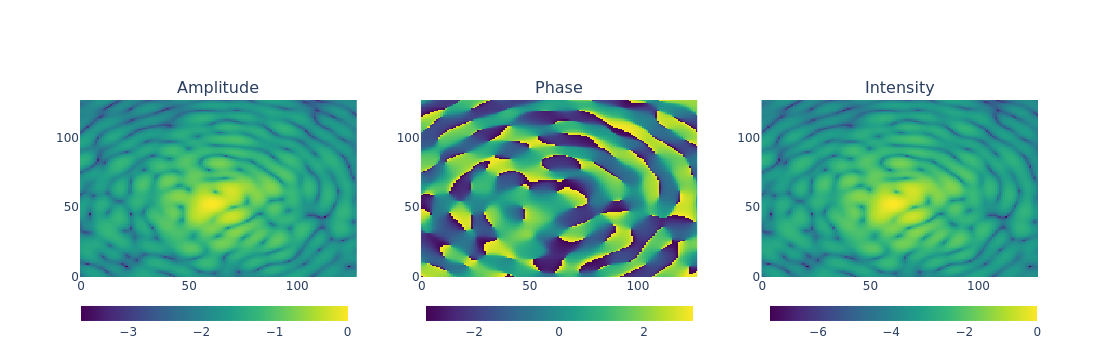

In [13]:
cfs = np.load(FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH)
cf = cfs[2].reshape(2, 128, 128)
cf = cf[0] + 1j*cf[1]
plot_amplitude_phase_intensity_from_complex_field(cf)

# Output fluxes normalization

In [1]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX, \
                          FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_TEST_OUTPUT_FLUXES_FILE_PATH, \
                          SUBFILE_SAMPLES

from data_utils import normalize_data, \
                       save_numpy_array

import numpy as np

In [4]:
a = np.load(FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH)

In [5]:
a[0]

array([-0.8274677 , -0.91153634, -0.5369203 , -0.9691012 ,  3.1721385 ,
       -0.43270537, -0.01415182,  0.08121895,  0.48688632, -0.49754003,
        1.6888754 , -0.02799126,  0.0355118 , -0.7206602 , -0.5574148 ,
       -0.8406015 , -0.7939514 , -0.636752  ,  0.3829765 ], dtype=float32)

In [6]:
a[1]

array([ 3.1886728 ,  0.43727672,  0.23113436,  0.23076664,  1.7570795 ,
       -0.01581538, -0.03266558, -0.6984111 , -0.69110376, -0.8125299 ,
        0.15248533, -0.755681  , -0.40084773,  0.4417135 ,  0.6295259 ,
        0.14827925,  0.10797503, -0.21303535, -0.35276434], dtype=float32)

In [7]:
a[2]

array([-0.36653495,  4.5698104 ,  0.28547013,  2.3344738 ,  1.2165959 ,
       -0.73883784, -0.83120126, -0.8248587 , -0.4009163 , -0.42421818,
       -0.67010194, -0.77577037,  0.01583376, -0.85666114,  0.02373379,
       -0.7044342 , -0.6560669 ,  0.02756628, -0.9444931 ], dtype=float32)

In [2]:
def process_output_fuxess(filepath):
    output_fluxes = np.load(filepath)
    norm_fluxes, scaler = normalize_data(output_fluxes)
    
    return norm_fluxes

In [3]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_OUTPUT_FLUXES_FILE_PREFIX}{train_file}{NUMPY_SUFFIX}"
    processed_output_fluxes_arrays = process_output_fuxess(filepath)

    save_numpy_array(processed_output_fluxes_arrays,
                    f"{FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX}{train_file}{NUMPY_SUFFIX}")

In [4]:
processed_output_fluxes_arrays = process_output_fuxess(VALIDATION_OUTPUT_FLUXES_FILE_PATH)

save_numpy_array(processed_output_fluxes_arrays,
                 FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH)

In [5]:
processed_output_fluxes_arrays = process_output_fuxess(TEST_OUTPUT_FLUXES_FILE_PATH)

save_numpy_array(processed_output_fluxes_arrays,
                 FC_PROCESSED_TEST_OUTPUT_FLUXES_FILE_PATH)